# Model Training

In this notebook, we train a convolutional neural network (CNN)
on the MNIST dataset using PyTorch.

In [1]:
# Import Libraries

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

## Device Configuration (Device Selection)

The model is trained using GPU if available; otherwise, CPU is used.

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [5]:
# Load Dataset with Preprocessing

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = datasets.MNIST(
    root="../data",
    train=True,
    download=False,
    transform=transform
)

test_dataset = datasets.MNIST(
    root="../data",
    train=False,
    download=False,
    transform=transform
)

In [7]:
# DataLoader

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [9]:
# Define CNN Model

class CNNMNIST(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, 3)
        self.conv2 = nn.Conv2d(32, 64, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 5 * 5, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [10]:
# Initialize Model, Loss, Optimizer

model = CNNMNIST().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# Training Loop

num_epochs = 5 # 5 epochs are enough for MNIST problem

train_losses = []
train_accuracies = []

for epoch in range(num_epochs):
    model.train()
    correct = 0
    total = 0
    running_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_loader)
    epoch_acc = correct / total

    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_acc)

    print(f"Epoch [{epoch+1}/{num_epochs}] - "
          f"Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}")

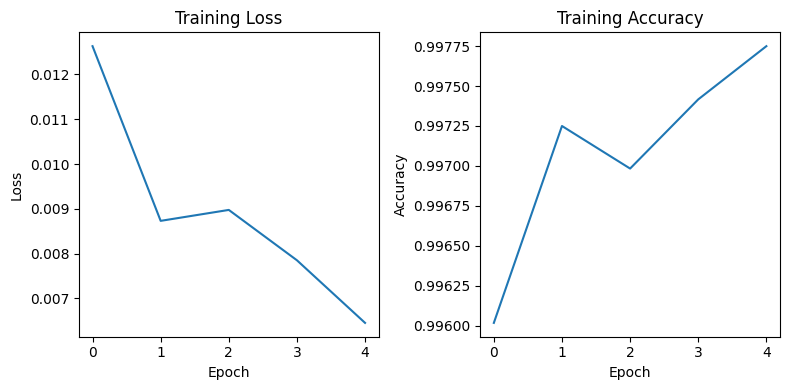

In [14]:
# Plot Training Curves

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.plot(train_losses)
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.subplot(1, 2, 2)
plt.plot(train_accuracies)
plt.title("Training Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.tight_layout()
plt.savefig("../images/training_curves.png", bbox_inches="tight")
plt.show()

In [15]:
# Save Trained Model

import os

os.makedirs("../models", exist_ok=True)
torch.save(model.state_dict(), "../models/cnn_mnist.pth")

## Training Summary

- The CNN converges quickly on the MNIST dataset.
- Training accuracy exceeds 98% within a few epochs.
- The trained model is saved for later evaluation and deployment.